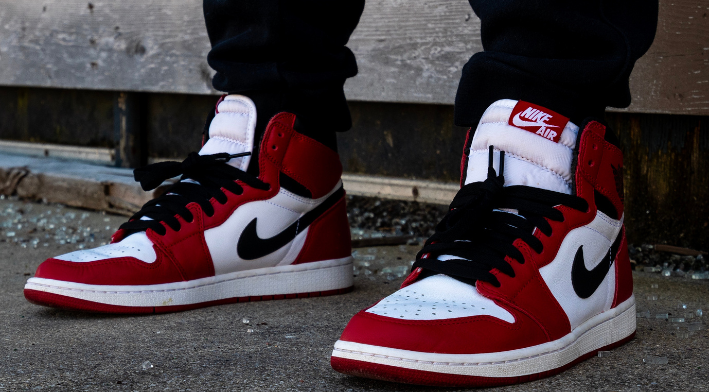

## 1. Counting missing values
<p>Sports clothing and athleisure attire is a huge industry, worth approximately <a href="https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/">$193 billion in 2021</a> with a strong growth forecast over the next decade! </p>
<p>In this notebook, we play the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. We will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  </p>
<p>The database provided to us, <code>sports</code>, contains five tables, with <code>product_id</code> being the primary key for all of them: </p>
<h3 id="info"><code>info</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_name</code></td>
<td><code>varchar</code></td>
<td>Name of the product</td>
</tr>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>description</code></td>
<td><code>varchar</code></td>
<td>Description of the product</td>
</tr>
</tbody>
</table>
<h3 id="finance"><code>finance</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>listing_price</code></td>
<td><code>float</code></td>
<td>Listing price for product</td>
</tr>
<tr>
<td><code>sale_price</code></td>
<td><code>float</code></td>
<td>Price of the product when on sale</td>
</tr>
<tr>
<td><code>discount</code></td>
<td><code>float</code></td>
<td>Discount, as a decimal, applied to the sale price</td>
</tr>
<tr>
<td><code>revenue</code></td>
<td><code>float</code></td>
<td>Amount of revenue generated by each product, in US dollars</td>
</tr>
</tbody>
</table>
<h3 id="reviews"><code>reviews</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_name</code></td>
<td><code>varchar</code></td>
<td>Name of the product</td>
</tr>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>rating</code></td>
<td><code>float</code></td>
<td>Product rating, scored from <code>1.0</code> to <code>5.0</code></td>
</tr>
<tr>
<td><code>reviews</code></td>
<td><code>float</code></td>
<td>Number of reviews for the product</td>
</tr>
</tbody>
</table>
<h3 id="traffic"><code>traffic</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>last_visited</code></td>
<td><code>timestamp</code></td>
<td>Date and time the product was last viewed on the website</td>
</tr>
</tbody>
</table>
<h3 id="brands"><code>brands</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>brand</code></td>
<td><code>varchar</code></td>
<td>Brand of the product</td>
</tr>
</tbody>
</table>
<p>We will be dealing with missing data as well as numeric, string, and timestamp data types to draw insights about the products in the online store. Let's start by finding out how complete the data is.</p>

In [2]:
%%sql
postgresql:///sports
    
-- Count all columns as total_rows
-- Count the number of non-missing entries for description, listing_price, and last_visited
-- Join info, finance, and traffic

SELECT COUNT(*) AS total_rows, 
    COUNT(i.description) AS count_description, 
    COUNT(f.listing_price) AS count_listing_price, 
    COUNT(t.last_visited) AS count_last_visited 
FROM info AS i
INNER JOIN finance AS f
    ON i.product_id = f.product_id
INNER JOIN traffic AS t
    ON t.product_id = f.product_id;

1 rows affected.


total_rows,count_description,count_listing_price,count_last_visited
3179,3117,3120,2928


## 2. Nike vs Adidas pricing
<p>We can see the database contains 3,179 products in total. Of the columns we previewed, only one &mdash; <code>last_visited</code> &mdash; is missing more than five percent of its values. Now let's turn our attention to pricing. </p>
<p>How do the price points of Nike and Adidas products differ? Answering this question can help us build a picture of the company's stock range and customer market. We will run a query to produce a distribution of the <code>listing_price</code> and the count for each price, grouped by <code>brand</code>. </p>

In [4]:
%%sql
    
-- Select the brand, listing_price as an integer, and a count of all products in finance 
-- Join brands to finance on product_id
-- Filter for products with a listing_price more than zero
-- Aggregate results by brand and listing_price, and sort the results by listing_price in descending order

SELECT b.brand, f.listing_price::integer, COUNT(f.*)
FROM finance AS f
INNER JOIN brands AS b 
    ON f.product_id = b.product_id
WHERE listing_price > 0
GROUP BY b.brand, f.listing_price
ORDER BY listing_price DESC;

 * postgresql:///sports
77 rows affected.


brand,listing_price,count
Adidas,300,2
Adidas,280,4
Adidas,240,5
Adidas,230,8
Adidas,220,11
Nike,200,1
Adidas,200,8
Nike,190,2
Adidas,190,7
Nike,180,4


## 3. Labeling price ranges
<p>It turns out there are 77 unique prices for the products in our database, which makes the output of our last query quite difficult to analyze. </p>
<p>Let's build on our previous query by assigning labels to different price ranges, grouping by <code>brand</code> and <code>label</code>. We will also include the total <code>revenue</code> for each price range and <code>brand</code>. </p>

In [6]:
%%sql

-- Select the brand, a count of all products in the finance table, and total revenue
-- Create four labels for products based on their price range, aliasing as price_category
-- Join brands to finance on product_id and filter out products missing a value for brand
-- Group results by brand and price_category, sort by total_revenue

SELECT b.brand, COUNT(f.*), SUM(f.revenue) as total_revenue,
CASE WHEN f.listing_price < 42 THEN 'Budget'
    WHEN f.listing_price >= 42 AND f.listing_price < 74 THEN 'Average'
    WHEN f.listing_price >= 74 AND f.listing_price < 129 THEN 'Expensive'
    ELSE 'Elite' END AS price_category
FROM finance AS f
INNER JOIN brands AS b 
    ON f.product_id = b.product_id
WHERE b.brand IS NOT NULL
GROUP BY b.brand, price_category
ORDER BY total_revenue DESC;

 * postgresql:///sports
8 rows affected.


brand,count,total_revenue,price_category
Adidas,849,4626980.069999999,Expensive
Adidas,1060,3233661.060000001,Average
Adidas,307,3014316.8299999987,Elite
Adidas,359,651661.1200000002,Budget
Nike,357,595341.0199999992,Budget
Nike,82,128475.59000000003,Elite
Nike,90,71843.15000000004,Expensive
Nike,16,6623.5,Average


## 4. Average discount by brand
<p>Interestingly, grouping products by brand and price range allows us to see that Adidas items generate more total revenue regardless of price category! Specifically, <code>"Elite"</code> Adidas products priced \$129 or more typically generate the highest revenue, so the company can potentially increase revenue by shifting their stock to have a larger proportion of these products!</p>
<p>Note we have been looking at <code>listing_price</code> so far. The <code>listing_price</code> may not be the price that the product is ultimately sold for. To understand <code>revenue</code> better, let's take a look at the <code>discount</code>, which is the percent reduction in the <code>listing_price</code> when the product is actually sold. We would like to know whether there is a difference in the amount of <code>discount</code> offered between brands, as this could be influencing <code>revenue</code>.</p>

In [8]:
%%sql
    
-- Select brand and average_discount as a percentage
-- Join brands to finance on product_id
-- Aggregate by brand
-- Filter for products without missing values for brand

SELECT b.brand, AVG(f.discount) * 100 AS average_discount
FROM brands AS b
INNER JOIN finance AS f 
    ON b.product_id = f.product_id
GROUP BY b.brand
HAVING b.brand IS NOT NULL
ORDER BY average_discount;

 * postgresql:///sports
2 rows affected.


brand,average_discount
Nike,0.0
Adidas,33.452427184465606


## 5. Correlation between revenue and reviews
<p>Strangely, no <code>discount</code> is offered on Nike products! In comparison, not only do Adidas products generate the most revenue, but these products are also heavily discounted! </p>
<p>To improve revenue further, the company could try to reduce the amount of discount offered on Adidas products, and monitor sales volume to see if it remains stable. Alternatively, it could try offering a small discount on Nike products. This would reduce average revenue for these products, but may increase revenue overall if there is an increase in the volume of Nike products sold. </p>
<p>Now explore whether relationships exist between the columns in our database. We will check the strength and direction of a correlation between <code>revenue</code> and <code>reviews</code>. </p>

In [10]:
%%sql

-- Calculate the correlation between reviews and revenue as review_revenue_corr
-- Join the reviews and finance tables on product_id

SELECT corr(r.reviews, f.revenue) AS review_revenue_corr
FROM reviews AS r
INNER JOIN finance AS f 
    ON r.product_id = f.product_id;

 * postgresql:///sports
1 rows affected.


review_revenue_corr
0.6518512283481301


## 6. Ratings and reviews by product description length
<p>Interestingly, there is a strong positive correlation between <code>revenue</code> and <code>reviews</code>. This means, potentially, if we can get more reviews on the company's website, it may increase sales of those items with a larger number of reviews. </p>
<p>Perhaps the length of a product's <code>description</code> might influence a product's <code>rating</code> and <code>reviews</code> &mdash; if so, the company can produce content guidelines for listing products on their website and test if this influences <code>revenue</code>. Let's check this out!</p>

In [12]:
%%sql

-- Calculate description_length
-- Convert rating to a numeric data type and calculate average_rating
-- Join info to reviews on product_id and group the results by description_length
-- Filter for products without missing values for description, and sort results by description_length

SELECT TRUNC(LENGTH(i.description), -2) AS description_length,
    ROUND(AVG(r.rating::numeric), 2) AS average_rating
FROM info AS i
INNER JOIN reviews AS r 
    ON i.product_id = r.product_id
WHERE i.description IS NOT NULL
GROUP BY description_length
ORDER BY description_length;

 * postgresql:///sports
7 rows affected.


description_length,average_rating
0,1.87
100,3.21
200,3.27
300,3.29
400,3.32
500,3.12
600,3.65


## 7. Reviews by month and brand
<p>Unfortunately, there doesn't appear to be a clear pattern between the length of a product's <code>description</code> and its <code>rating</code>.</p>
<p>As we know a correlation exists between <code>reviews</code> and <code>revenue</code>, one approach the company could take is to run experiments with different sales processes encouraging more reviews from customers about their purchases, such as by offering a small discount on future purchases. </p>
<p>Let's take a look at the volume of <code>reviews</code> by month to see if there are any trends or gaps we can look to exploit.</p>

In [ ]:
%%sql

-- Select brand, month from last_visited, and a count of all products in reviews aliased as num_reviews
-- Join traffic with reviews and brands on product_id
-- Group by brand and month, filtering out missing values for brand and month
-- Order the results by brand and month

SELECT b.brand, DATE_PART('month', t.last_visited) AS month, COUNT(r.*) AS num_reviews
FROM brands AS b
INNER JOIN traffic AS t 
    ON b.product_id = t.product_id
INNER JOIN reviews AS r 
    ON t.product_id = r.product_id
GROUP BY b.brand, month
HAVING b.brand IS NOT NULL
    AND DATE_PART('month', t.last_visited) IS NOT NULL
ORDER BY b.brand, month;

## 8. Footwear product performance
<p>Looks like product reviews are highest in the first quarter of the calendar year, so there is scope to run experiments aiming to increase the volume of reviews in the other nine months!</p>
<p>So far, we have been primarily analyzing Adidas vs Nike products. Now, let's switch our attention to the type of products being sold. As there are no labels for product type, we will create a Common Table Expression (CTE) that filters <code>description</code> for keywords, then use the results to find out how much of the company's stock consists of footwear products and the median <code>revenue</code> generated by these items.</p>

In [ ]:
%%sql

-- Create the footwear CTE, containing description and revenue
-- Filter footwear for products with a description containing %shoe%, %trainer, or %foot%
-- Also filter for products that are not missing values for description
-- Calculate the number of products and median revenue for footwear products

WITH footwear AS
(
    SELECT i.description, f.revenue
    FROM info AS i
    INNER JOIN finance AS f 
        ON i.product_id = f.product_id
    WHERE i.description ILIKE '%shoe%'
        OR i.description ILIKE '%trainer%'
        OR i.description ILIKE '%foot%'
        AND i.description IS NOT NULL
)

SELECT COUNT(*) AS num_footwear_products, 
    percentile_disc(0.5) WITHIN GROUP (ORDER BY revenue) AS median_footwear_revenue
FROM footwear;

## 9. Clothing product performance
<p>Recall from the first task that we found there are 3,117 products without missing values for <code>description</code>. Of those, 2,700 are footwear products, which accounts for around 85% of the company's stock. They also generate a median revenue of over $3000 dollars!</p>
<p>This is interesting, but we have no point of reference for whether footwear's <code>median_revenue</code> is good or bad compared to other products. So, for our final task, let's examine how this differs to clothing products. We will re-use <code>footwear</code>, adding a filter afterward to count the number of products and <code>median_revenue</code> of products that are not in <code>footwear</code>.</p>

In [ ]:
%%sql

-- Copy the footwear CTE from the previous task
-- Calculate the number of products in info and median revenue from finance
-- Inner join info with finance on product_id
-- Filter the selection for products with a description not in footwear

WITH footwear AS
(
    SELECT i.description, f.revenue
    FROM info AS i
    INNER JOIN finance AS f 
        ON i.product_id = f.product_id
    WHERE i.description ILIKE '%shoe%'
        OR i.description ILIKE '%trainer%'
        OR i.description ILIKE '%foot%'
        AND i.description IS NOT NULL
)

SELECT COUNT(i.*) AS num_clothing_products, 
    percentile_disc(0.5) WITHIN GROUP (ORDER BY f.revenue) AS median_clothing_revenue
FROM info AS i
INNER JOIN finance AS f on i.product_id = f.product_id
WHERE i.description NOT IN (SELECT description FROM footwear);